# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice. 
mouseNumber = df["Mouse ID"].nunique()
mouseNumber

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#array(['g989'], dtype=object)
mouseDuplicate = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouseDuplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dfDuplicate = df.loc[df["Mouse ID"] == "g989", :]
dfDuplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dfClean = df[df['Mouse ID'].isin(mouseDuplicate)==False]
dfClean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
miceClean = dfClean["Mouse ID"].nunique()

miceClean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = dfClean['Tumor Volume (mm3)'].groupby(dfClean['Drug Regimen']).mean()
median = dfClean['Tumor Volume (mm3)'].groupby(dfClean['Drug Regimen']).median()
variance = dfClean['Tumor Volume (mm3)'].groupby(dfClean['Drug Regimen']).var()
stdev = dfClean['Tumor Volume (mm3)'].groupby(dfClean['Drug Regimen']).std()
sem = dfClean['Tumor Volume (mm3)'].groupby(dfClean['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
statSummary = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":stdev, 
                           "Tumor Volume Std. Err.":sem})
statSummary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggSummary =  df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggSummary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

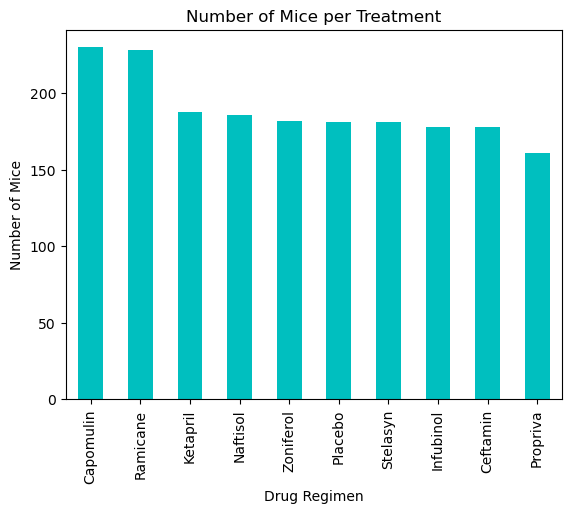

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

miceTreatmentBar = df["Drug Regimen"].value_counts().plot.bar(color='c')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

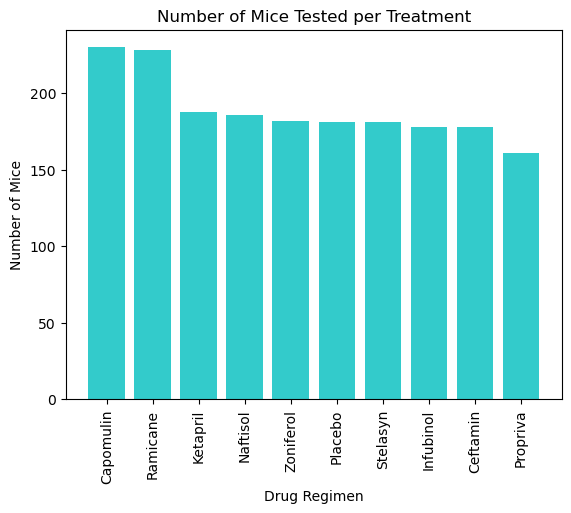

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(df["Drug Regimen"].value_counts().index.values, df["Drug Regimen"].value_counts().values, color='c', alpha=0.8, align='center')

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


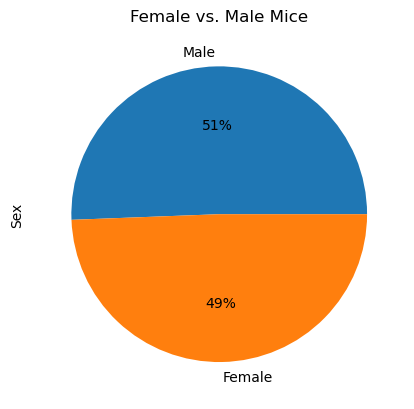

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.title("Female vs. Male Mice")
df["Sex"].value_counts().plot.pie(autopct= "%1.00f%%")
plt.show()

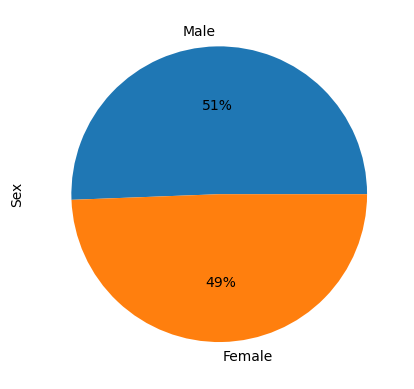

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = df["Sex"].value_counts().plot.pie(y='Total Count', autopct="%1.00f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
type(dfClean['Mouse ID'])

pandas.core.series.Series

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# groupby mice in order to find final tumor volume
#then aggregate group and say give me final tumor volume, which is most recent time 

# Start by getting the last (greatest) timepoint for each mouse
mouseLast = dfClean.groupby('Mouse ID')

maxTimepoint = mouseLast[['Timepoint']].max()

maxTimepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# df1.merge(df2, how='inner', on='a')
maxDf = maxTimepoint.merge(dfClean, how='inner', on=['Mouse ID', 'Timepoint'])
maxDf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
currentDrug = 'Ramicane'
tumorVolume = []
ramicaneDf = maxDf.loc[maxDf['Drug Regimen'] == 'Ramicane']
capomulinDf = maxDf.loc[maxDf['Drug Regimen'] == 'Capomulin']
infubinolDf = maxDf.loc[maxDf['Drug Regimen'] == 'Infubinol']
ceftaminDf = maxDf.loc[maxDf['Drug Regimen'] == 'Ceftamin']
capomulinDf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugRegimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumorVolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i in drugRegimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    currentDrug = maxDf.loc[maxDf['Drug Regimen'] == i]['Tumor Volume (mm3)']
    
    # add subset
    tumorVolume.append(currentDrug)
    
    # Determine outliers using upper and lower bounds
    quartiles = currentDrug.quantile([0.25, 0.5, 0.75])
    lowerQuartile = quartiles[0.25]
    upperQuartile = quartiles[0.75]
    iqr = upperQuartile - lowerQuartile
    lowerBound = lowerQuartile - (iqr * 1.5)
    upperBound = upperQuartile + (iqr * 1.5)
    columnOutliers = currentDrug.loc[(lowerBound > currentDrug)|(upperBound < currentDrug)]
    print(i, columnOutliers)
#tumorVolume  

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


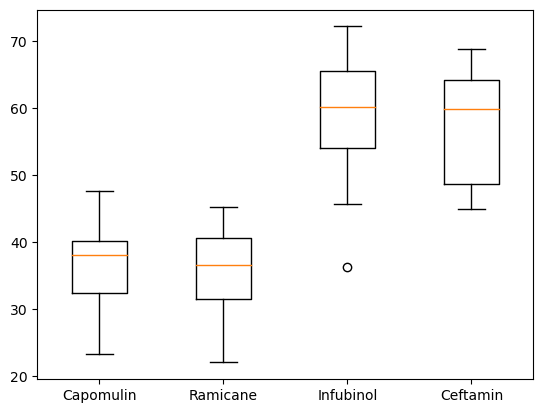

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#move to next cell
plt.boxplot(tumorVolume, labels=drugRegimen);


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

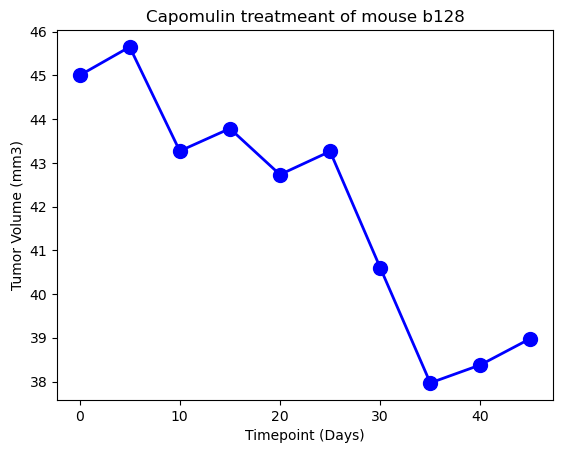

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#choose one mouseID
mouseDf = dfClean.loc[dfClean["Mouse ID"] == "b128",:]
mouseDf.head()
x_axis = mouseDf["Timepoint"]
tumorSize = mouseDf["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, tumorSize,linewidth=2, markersize=10,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

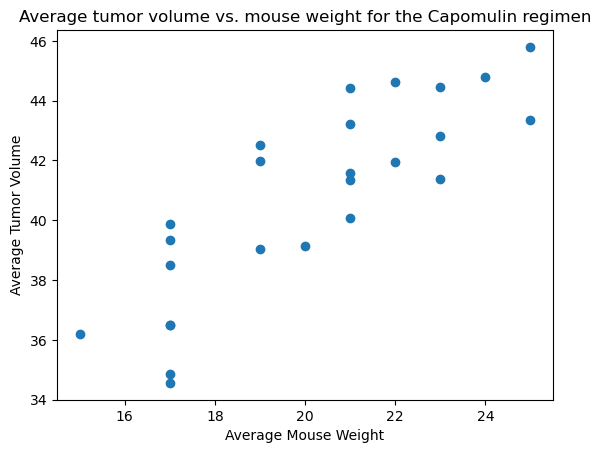

In [56]:
# Generate a scatter plot of average tumor volume vs. average mouse weight for the Capomulin regimen
#what am I putting on x and y 
# average tumor volume 
#mouse weight
#capomulin regimen - this is a filter for the data, not a point on the chart
capomulinDf = dfClean.loc[dfClean['Drug Regimen'] == 'Capomulin']
capomulinDf

mouseGroupby = capomulinDf.groupby('Mouse ID')

tumorVol = mouseGroupby["Tumor Volume (mm3)"].mean()
x_axis = mouseGroupby["Weight (g)"].mean()

plt.scatter(x_axis, tumorVol);
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Average Mouse Weight");

## Correlation and Regression

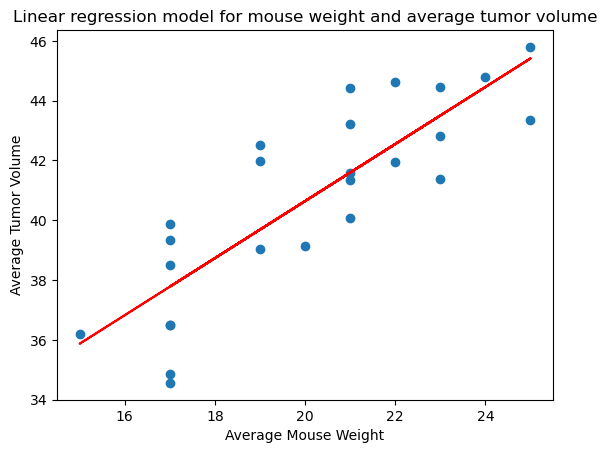

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#going off of Capomulin DF. average weight of the mouse and average tumor volume
#same scatter plot but with regression line going through it 


(slope, intercept, r, p, se) = st.linregress(x_axis, tumorVol, alternative='two-sided')
regressionLine = (x_axis * slope)+intercept  
plt.scatter(x_axis, tumorVol)
plt.plot(x_axis, regressionLine, "r-")
plt.title("Linear regression model for mouse weight and average tumor volume")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Average Mouse Weight");